<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем--файлы-и-посмотрим-информацию" data-toc-modified-id="Откроем--файлы-и-посмотрим-информацию-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем  файлы и посмотрим информацию</a></span></li><li><span><a href="#Рассчитаем-эффективность-обогащения-(rougher.output.recovery)" data-toc-modified-id="Рассчитаем-эффективность-обогащения-(rougher.output.recovery)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассчитаем эффективность обогащения (rougher.output.recovery)</a></span></li><li><span><a href="#Проверка-признаков,-отсутствующих-в-тестовой-выборке" data-toc-modified-id="Проверка-признаков,-отсутствующих-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка признаков, отсутствующих в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сравнение-концентрации-металлов" data-toc-modified-id="Сравнение-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сравнение концентрации металлов</a></span></li><li><span><a href="#Сравнение-распределения-размера-гранул" data-toc-modified-id="Сравнение-распределения-размера-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размера гранул</a></span></li><li><span><a href="#Исследование-суммарной-концентрации" data-toc-modified-id="Исследование-суммарной-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-расчета-итогового-sMAPE" data-toc-modified-id="Функция-для-расчета-итогового-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для расчета итогового sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [45]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor

### Откроем  файлы и посмотрим информацию

In [46]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates = ['date'])
gold_recovery_train
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant     

In [47]:
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates = ['date'])
gold_recovery_test
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
ro

In [48]:
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates = ['date'])
gold_recovery_full
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null datetime64[ns]
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant     

### Рассчитаем эффективность обогащения (rougher.output.recovery)

В формулу для расчета эффективности обогащения подставим необходимые признаки из таблицы с обучающими данными и сохраним это в переменную recovery_pred (так как это можно считать предсказанными данными, раз мы их вычисляем по формуле).

In [49]:
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']
for i in range(len(gold_recovery_train)):
    recovery_pred = C * (F - T) / (F * (C - T)) * 100

Воспользуемся метрикой MAE из библиотеки sklearn, чтобы оценить различие между вычисленной эффективностью и той, что есть в исходных данных.

In [50]:
mean_absolute_error(gold_recovery_train['rougher.output.recovery'], recovery_pred)

9.682896147825551e-15

Значение MAE очень маленькое (близко к нулю), что означает, что эффективность обогащения рассчитана правильно.

### Проверка признаков, отсутствующих в тестовой выборке

Проанализируем признаки, недоступные в тестовой выборке. Для этого возьмем названия колонок тестовой выборки и выкинем одноименные колонки из общей выборки. Сохраним получившуюся таблицу под названием df_target (так как отсутствующие в тестовой выборке признаки - это целевые признаки).

In [51]:
gold_recovery_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [52]:
df_target = gold_recovery_train.drop(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'], axis=1)

In [53]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.output.concentrate_ag                 14149 non-null float64
primary_cleaner.output.concentrate_pb                 14063 non-null float64
primary_cleaner.output.concentrate_sol      

В тестовую таблицу не попали целевые признаки (с типом output) для 4 разных веществ (Au - золото, Ag - серебро, Pb - свинец и Sol - скорее всего, прочие примеси), на разных этапах технологического процесса для концентратов и отвальных хвостов. Помимо этого не попали признаки с типом "расчётные характеристики" (calculation), потому что замеряются и/или рассчитываются значительно позже.

### Предобработка данных

При открытии таблиц в pandas, мы уже перевели тип данных столбца "date" в тип данных datetime64. Поскольку в условии проекта говорится, что "соседние по времени параметры часто похожи", то можно заполнить пропуски соседними по времени значениями, используя методы ffill или bfill (остановимся на ffill).

In [54]:
gold_recovery_test = gold_recovery_test.ffill()
gold_recovery_train = gold_recovery_train.ffill()
gold_recovery_full = gold_recovery_full.ffill()

In [55]:
gold_recovery_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

## Анализ данных

### Сравнение концентрации металлов
Посмотрим как менялась концентрация металлов (Au, Pb, Ag) на различных этапах обработки.

In [56]:
au_conc = gold_recovery_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
ag_conc = gold_recovery_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
pb_conc = gold_recovery_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

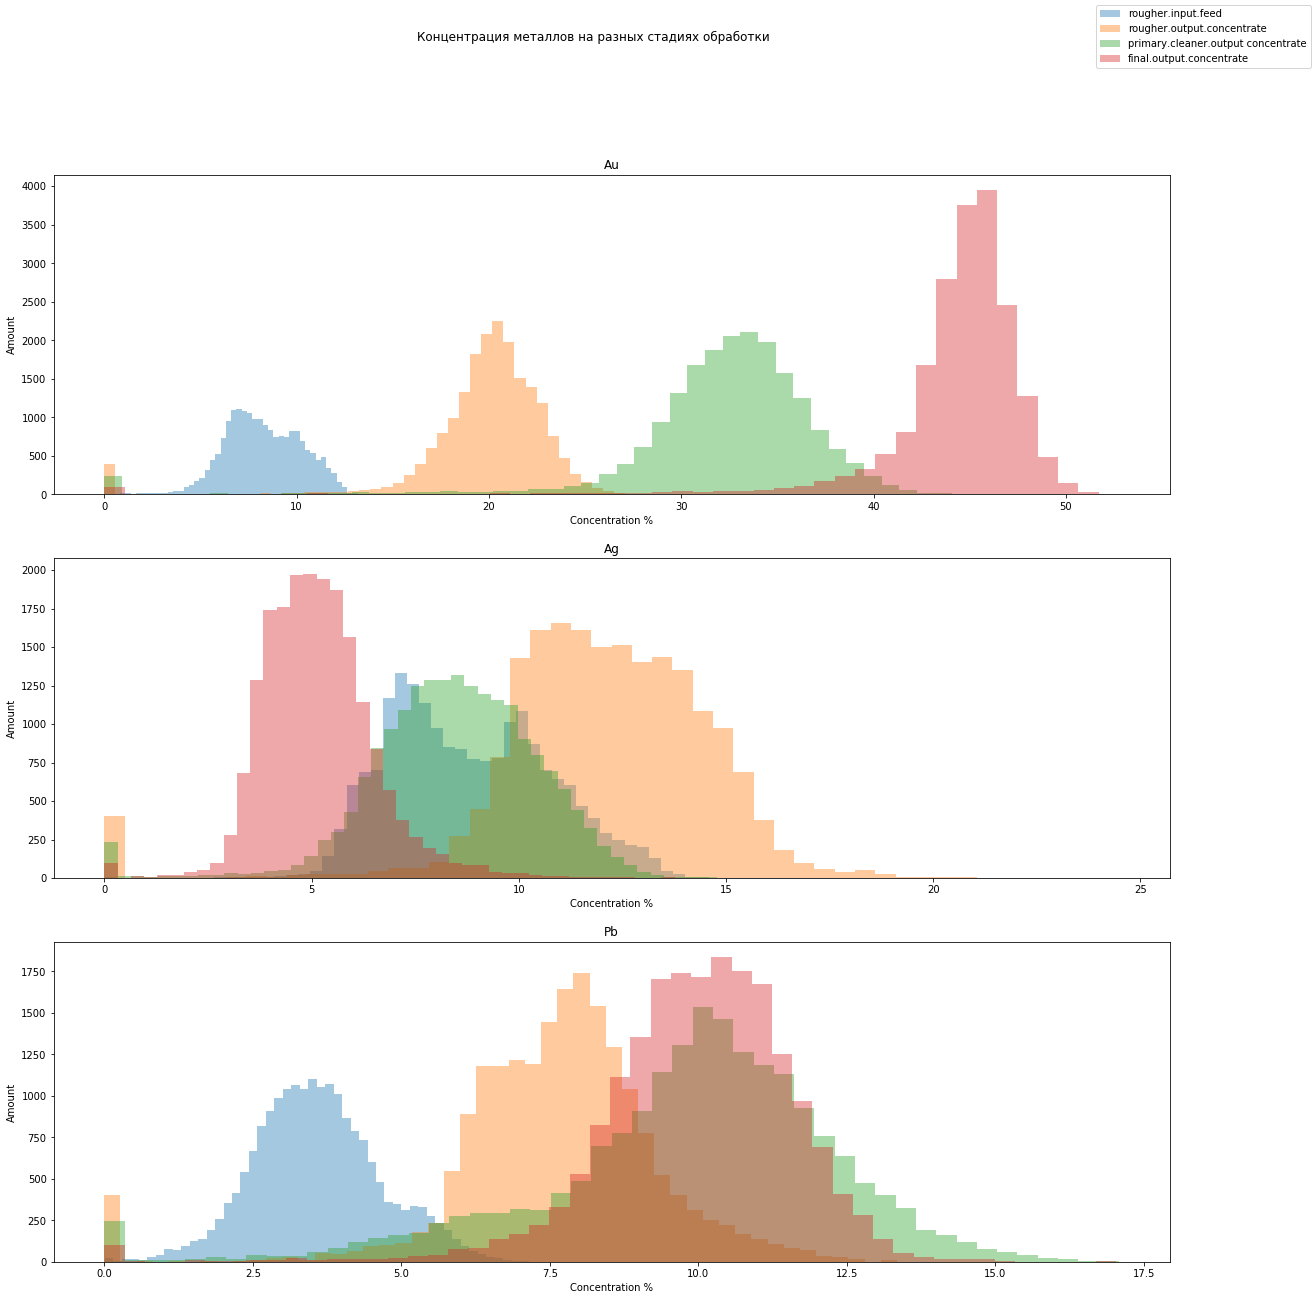

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))
for column in list(au_conc):
    sns.distplot(au_conc[column], ax=axes[0], kde=False)
axes[0].set(title="Au", xlabel="Concentration %", ylabel="Amount")
for column in list(ag_conc):
    sns.distplot(ag_conc[column], ax=axes[1], kde=False)
axes[1].set(title="Ag", xlabel="Concentration %", ylabel="Amount")
for column in list(pb_conc):
    sns.distplot(pb_conc[column], ax=axes[2], kde=False)
axes[2].set(title="Pb", xlabel="Concentration %", ylabel="Amount")
fig.suptitle("Концентрация металлов на разных стадиях обработки")
fig.legend(["rougher.input.feed", "rougher.output.concentrate", "primary.cleaner.output concentrate", "final.output.concentrate"])
fig.show()

Концентрация золота закономерно растет с каждым этапом очисткии к финальному этапу составляет приблизительно 45%.

Концентрация сребра к финальному этапу падаети оказывается около 5%, видимо много вымывается или уходит в отвалы.

Концентрация свинца практически не меняется от этапа к этапу.

### Сравнение распределения размера гранул

Посмотрим распределение размера гранул для обучающей и тестовой выборок. 

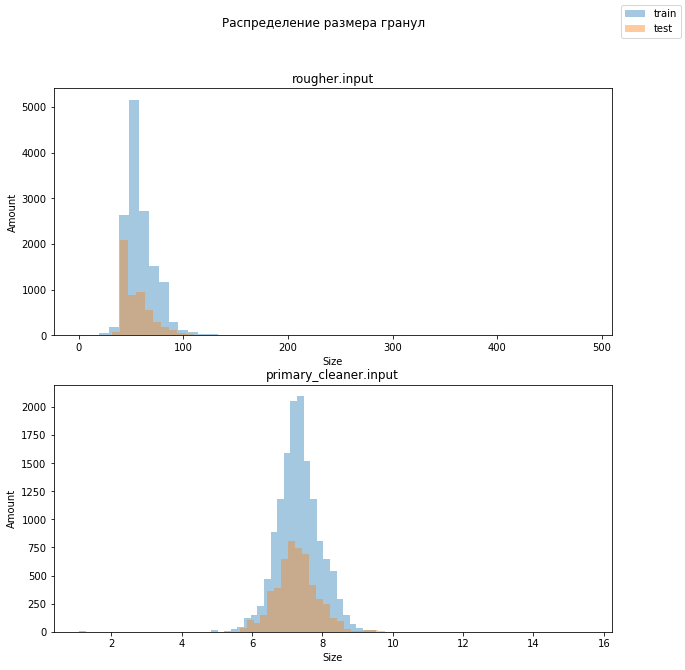

In [58]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.distplot(gold_recovery_train['rougher.input.feed_size'], ax=axes[0], kde=False)
sns.distplot(gold_recovery_test['rougher.input.feed_size'], ax=axes[0], kde=False)
axes[0].set(title="rougher.input", xlabel="Size", ylabel="Amount")

sns.distplot(gold_recovery_train['primary_cleaner.input.feed_size'], ax=axes[1], kde=False)
sns.distplot(gold_recovery_test['primary_cleaner.input.feed_size'], ax=axes[1], kde=False)
axes[1].set(title="primary_cleaner.input", xlabel="Size", ylabel="Amount")

fig.suptitle("Распределение размера гранул")
fig.legend(["train", "test"])
fig.show()

После флотации размер гранул уменьшается почти в 10 раз. Распределение размеров гранул на тестовой и обучающей выборках практически не отличаются, значит оценка модели может быть правильной.

### Исследование суммарной концентрации
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [59]:
gold_recovery_full['rougher.output_concentrate_sum'] = gold_recovery_full['rougher.output.concentrate_ag'] + gold_recovery_full['rougher.output.concentrate_au'] + gold_recovery_full['rougher.output.concentrate_pb']+ gold_recovery_full['rougher.output.concentrate_sol'] 

In [60]:
gold_recovery_full['final.output.concentrate_sum'] = gold_recovery_full['final.output.concentrate_ag'] + gold_recovery_full['final.output.concentrate_au'] + gold_recovery_full['final.output.concentrate_pb']+ gold_recovery_full['final.output.concentrate_sol'] 

In [61]:
gold_recovery_full['rougher.input.feede_sum'] = gold_recovery_full['rougher.input.feed_ag'] + gold_recovery_full['rougher.input.feed_au'] + gold_recovery_full['rougher.input.feed_pb']+ gold_recovery_full['rougher.input.feed_sol'] 

In [62]:
metal_concentrate_sum = gold_recovery_full[['rougher.input.feede_sum', 'rougher.output_concentrate_sum', 'final.output.concentrate_sum']]

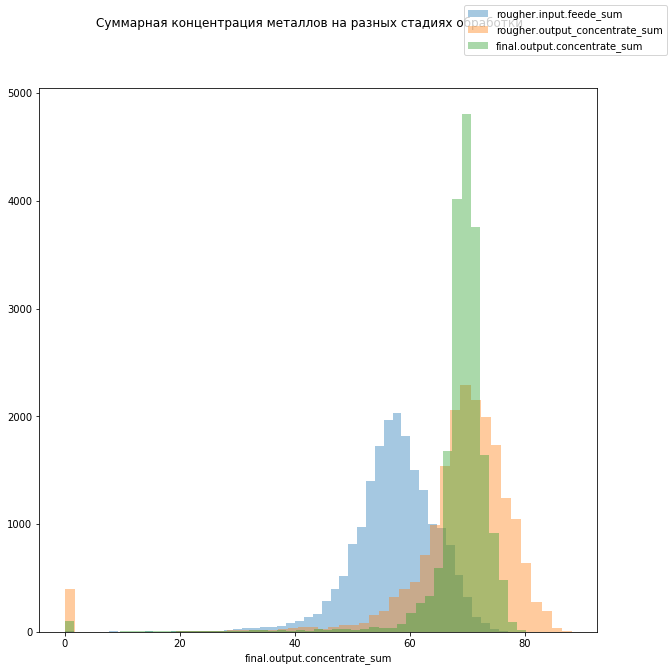

In [63]:
fig = plt.figure(figsize=(10, 10))
for column in list(metal_concentrate_sum):
    sns.distplot(metal_concentrate_sum[column],  kde=False)
fig.suptitle("Суммарная концентрация металлов на разных стадиях обработки")
fig.legend(["rougher.input.feede_sum", "rougher.output_concentrate_sum", "final.output.concentrate_sum"])
fig.show()

Концентрация веществ в процессе обработки и очистки увеличивается, имеются аномальные выбросы в районе нулевой сумарной концентрации, но их слишком много, чтобы пренебрегать ими.

Посмотрим сколько строк имеют нулевую сумарную концентрацию на разных этапах и одновременно на 3 этапах.

In [64]:
gold_recovery_full.loc[gold_recovery_full['rougher.input.feede_sum'] == 0].shape

(0, 90)

In [65]:
gold_recovery_full.loc[gold_recovery_full['rougher.output_concentrate_sum'] == 0].shape

(394, 90)

In [66]:
gold_recovery_full.loc[gold_recovery_full['final.output.concentrate_sum'] == 0].shape

(98, 90)

In [67]:
gold_recovery_full.loc[(gold_recovery_full['rougher.input.feede_sum'] == 0) & 
                       (gold_recovery_full['rougher.output_concentrate_sum'] == 0) &
                        (gold_recovery_full['final.output.concentrate_sum'] == 0)].shape

(0, 90)

В чистом сырье нулевой концентрации нет, она появляется на этапах обработки. Уберем строки в обучающем датасете, где на каком-либо этапе нулевая суммарная концентрация, но судя по графику можно обрезать "хвост" до 20%.

Для этого сделаем в полной таблице индексирование по столбцу 'date', сделаем список индексов строк, где на всех этапах суммарная концентрация больше 20%. И оставим в обучающей таблице только строки с индексами из этого списка.

In [68]:
gold_full = gold_recovery_full.set_index(['date'])
good_index = gold_full.loc[(gold_full['rougher.input.feede_sum'] > 20) & 
                (gold_full['rougher.output_concentrate_sum'] > 20) &
                (gold_full['final.output.concentrate_sum'] > 20)].index
good_index

DatetimeIndex(['2016-01-15 00:00:00', '2016-01-15 01:00:00',
               '2016-01-15 02:00:00', '2016-01-15 03:00:00',
               '2016-01-15 04:00:00', '2016-01-15 05:00:00',
               '2016-01-15 06:00:00', '2016-01-15 07:00:00',
               '2016-01-15 08:00:00', '2016-01-15 09:00:00',
               ...
               '2018-08-18 01:59:59', '2018-08-18 02:59:59',
               '2018-08-18 03:59:59', '2018-08-18 04:59:59',
               '2018-08-18 05:59:59', '2018-08-18 06:59:59',
               '2018-08-18 07:59:59', '2018-08-18 08:59:59',
               '2018-08-18 09:59:59', '2018-08-18 10:59:59'],
              dtype='datetime64[ns]', name='date', length=18884, freq=None)

In [69]:
gold_train = gold_recovery_train.set_index(['date'])
gold_train = gold_train.loc[gold_train.index.isin(good_index)]
gold_train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


Из 14149 строк осталось 13741. Избавились от 3% строк.

## Модель

### Функция для расчета итогового sMAPE

In [70]:
def smape (target, predictions):
    numerator = abs(predictions - target)
    denominator = (abs(target) + abs(predictions)) / 2
    summa = (numerator / denominator).sum()
    smape = (1 / len(target)) * summa * 100
    return smape

Подготовим признаки для обучения и тестирования моделей.

Для "rougher":

In [71]:
features_rougher = []
for column in gold_recovery_test.columns:
    if "rougher" in column:
        features_rougher.append(column)
features_train_rougher = gold_train[features_rougher]
target_train_rougher = gold_train['rougher.output.recovery']

Для "final":

In [72]:
gold_test = gold_recovery_test.set_index(['date'])
features_train_final = gold_train[gold_test.columns]
target_train_final = gold_train['final.output.recovery']

Для тестовой выборки ("rougher") добавим целевой признак из общего датасета, с индексами, соответствующими датам тестовой выборки.

In [73]:
gold_full = gold_recovery_full.set_index(['date'])
gold_test['rougher.output.recovery'] = gold_full['rougher.output.recovery'][gold_test.index]
gold_test['final.output.recovery'] = gold_full['final.output.recovery'][gold_test.index]
gold_test['rougher.output.recovery'].tail()

date
2017-12-31 19:59:59    95.172585
2017-12-31 20:59:59    94.575036
2017-12-31 21:59:59    93.018138
2017-12-31 22:59:59    92.599042
2017-12-31 23:59:59    91.177695
Name: rougher.output.recovery, dtype: float64

In [74]:
features_test_rougher = gold_test[features_rougher]
target_test_rougher = gold_test['rougher.output.recovery']

Подготовим данные для проверки тестовой выборки "final".

In [75]:
features_test_final = gold_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_final = gold_test['final.output.recovery']

Сделаем масштабирование признаков.

In [76]:
scaler_rougher = StandardScaler()
features_train_rougher = scaler_rougher.fit_transform(features_train_rougher)

In [77]:
scaler_final = StandardScaler()
features_train_final = scaler_final.fit_transform(features_train_final)

In [78]:
scaler_rougher_test = StandardScaler()
features_test_rougher = scaler_rougher_test.fit_transform(features_test_rougher)

In [79]:
scaler_final_test = StandardScaler()
features_test_final = scaler_final_test.fit_transform(features_test_final)

Напишем функцию для оценки среднего sMAPE при кросвалидации датасета. 

In [80]:
def cross_val (model, features, target):
    scores = cross_val_score(model, features, 
                                   target, scoring=make_scorer(smape, greater_is_better=False), cv=5)
    smape_res = scores.mean()
    return smape_res

Напишем функцию, которая считает финальный sMAPE.

In [81]:
def model_smape(model):
    smape_rougher = -cross_val (model, features_train_rougher, target_train_rougher)
    smape_final = -cross_val (model, features_train_final, target_train_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final
    print('Средняя оценка качества по кросс-валидации на этапе флотации составила', smape_rougher)
    print('Средняя оценка качества по кросс-валидации на финальном этапе составила', smape_final)
    print('Конечная оценка качества по кросс-валидации составила', smape_end)

### Обучение моделей
Обучем 3 модели: DecisionTree, RandomForest и LinearRegression. И посмотрим значение финального sMAPE.

In [82]:
state = np.random.RandomState(12345) 

In [83]:
model = LinearRegression()
model_smape(model)

Средняя оценка качества по кросс-валидации на этапе флотации составила 6.567463138258319
Средняя оценка качества по кросс-валидации на финальном этапе составила 10.882451355325173
Конечная оценка качества по кросс-валидации составила 9.80370430105846


In [84]:
model = DecisionTreeRegressor()
model_smape(model)

Средняя оценка качества по кросс-валидации на этапе флотации составила 9.365604102646019
Средняя оценка качества по кросс-валидации на финальном этапе составила 15.175736256478581
Конечная оценка качества по кросс-валидации составила 13.72320321802044


In [85]:
model = RandomForestRegressor(random_state=12345)
model_smape(model)

Средняя оценка качества по кросс-валидации на этапе флотации составила 6.789183874957611
Средняя оценка качества по кросс-валидации на финальном этапе составила 9.917029895508072
Конечная оценка качества по кросс-валидации составила 9.135068390370456


In [86]:
model = DummyRegressor()
model_smape(model)

Средняя оценка качества по кросс-валидации на этапе флотации составила 7.73561339916878
Средняя оценка качества по кросс-валидации на финальном этапе составила 10.332144764435286
Конечная оценка качества по кросс-валидации составила 9.68301192311866


Лучшее значение sMAPE у RandomForest, она даже лучше, чем DummyRegressor. Подберем для RandomForest лучшие гиперпараметры.

In [87]:
best_smape = 11
est_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 5):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        smape_rougher = -cross_val (model, features_train_rougher, target_train_rougher)
        smape_final = -cross_val (model, features_train_final, target_train_final)
        smape_end = 0.25 * smape_rougher + 0.75 * smape_final
        if smape_end < best_smape:
            best_smape = smape_end
            best_est = est
            best_depth = depth
print('Наилучшая модель с sMAPE, равным {}, получена для случайного леса \
с количеством деревьев {} и глубиной {}'.format(best_smape, best_est, best_depth))

Наилучшая модель с sMAPE, равным 8.357812868785377, получена для случайного леса с количеством деревьев 40 и глубиной 4


### Проверка модели на тестовой выборке
Обучим модель RandomForestRegressor и проверим на тестовой выборке. Для этого напишем функцию.

In [88]:
def smape_test(features_rougher, features_final):
    model_r = RandomForestRegressor(random_state=12345, n_estimators=41, max_depth=4)
    model_r.fit(features_train_rougher, target_train_rougher)
    predict_r = model_r.predict(features_rougher)
    model_f = RandomForestRegressor(random_state=12345, n_estimators=41, max_depth=4)
    model_f.fit(features_train_final, target_train_final)
    predict_f = model_f.predict(features_final)
    smape_r =  smape(target_test_rougher, predict_r)
    smape_f =  smape(target_test_final, predict_f)
    smape_end = 0.25 * smape_r + 0.75 * smape_f
    print('Конечная оценка составила', smape_end)

In [89]:
smape_test(features_test_rougher, features_test_final)

Конечная оценка составила 9.823298144944689


## Выводы

В ходе проекта был подготовлен прототип модели машинного обучения для «Цифры».

Модель предсказывает коэффициент восстановления золота из золотосодержащей руды, используя данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В ходе проекта были обработаны исходные данные.

- Была рассчитана эффективность обогощения и проведено сравнение с исходными данными;

- Проведен анализ изменения концентрации металлов в руде, на разных этапах очистки, показавший, что концентрация золота растет с каждым этапом;

- Было проведено сравнение распределений размеров гранул на тестовой и обучающей выборке, показавшее, что они схожи;

- Была написана функция для вычисления итоговой sMAPE;

- Была выбрана модель с лучшим значением итоговой sMAPE, это RandomForest;

- sMAPE выбранной модели оказалось лучше, чем у Dummy, что означает, что ее применение может принести пользу;

- Выбранная модель была проверена на тестовой выборке.
